In [1]:
import numpy as np
import matplotlib.pyplot as plt

ph = np.load('Photon.npy')
ele = np.load('Electron.npy')
pi0 = np.load('Pizero.npy')
pipm = np.load('Piplusminus.npy')

In [2]:
data = np.vstack((ph[:100000,:],ele[:100000,:],pi0[:100000,:],pipm[:100000,:]))
datatest = np.vstack((ph[100000:125000,:],ele[100000:125000,:],pi0[100000:125000,:],pipm[100000:125000,:]))
datatest.shape

(100000, 323)

In [4]:
truez = data[:,2]
psb = data[:,20:83]
emb1 = data[:,83:134]
emb2 = data[:,134:197]
emb3 = data[:,197:260]                   
hab1 = data[:,260:]

# sum of all cells
cells_sum = np.sum(data[:,20:],axis=1).reshape(-1,1)

# sum of layers in phi
psb_sum = np.sum(psb.reshape(-1,7,9),axis=1)
emb1_sum = np.sum(emb1.reshape(-1,3,17),axis=1)
emb2_sum = np.sum(emb2.reshape(-1,7,9),axis=1)
emb3_sum = np.sum(emb3.reshape(-1,7,9),axis=1)
hab1_sum = np.sum(hab1.reshape(-1,7,9),axis=1)

# normalised sums
psb_nsum = psb_sum / cells_sum
emb1_nsum = emb1_sum / cells_sum
emb2_nsum = emb2_sum / cells_sum
emb3_nsum = emb3_sum / cells_sum
hab1_nsum = hab1_sum / cells_sum

# center eta of layers
psb_eta = data[:,6]
emb1_eta = data[:,8]
emb2_eta = data[:,10]
emb3_eta = data[:,12]
hab1_eta = data[:,14]
differ1 = psb_eta - emb1_eta
differ2 = emb1_eta - emb2_eta
differ3 = emb2_eta - emb3_eta
differ4 = emb3_eta - hab1_eta

In [5]:
train1 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),emb2_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1)))

train2 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,emb3_nsum,hab1_nsum,
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),
                          emb2_eta.reshape(-1,1),emb3_eta.reshape(-1,1),hab1_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1),differ3.reshape(-1,1),differ4.reshape(-1,1)))

train_target = truez

In [6]:
truezt = datatest[:,2]
psbt = datatest[:,20:83]
emb1t = datatest[:,83:134]
emb2t = datatest[:,134:197]
emb3t = datatest[:,197:260]                   
hab1t = datatest[:,260:]

# sum of all cells
cells_sumt = np.sum(datatest[:,20:],axis=1).reshape(-1,1)

# sum of layers in phi
psb_sumt = np.sum(psbt.reshape(-1,7,9),axis=1)
emb1_sumt = np.sum(emb1t.reshape(-1,3,17),axis=1)
emb2_sumt = np.sum(emb2t.reshape(-1,7,9),axis=1)
emb3_sumt = np.sum(emb3t.reshape(-1,7,9),axis=1)
hab1_sumt = np.sum(hab1t.reshape(-1,7,9),axis=1)

# normalised sums
psb_nsumt = psb_sumt / cells_sumt
emb1_nsumt = emb1_sumt / cells_sumt
emb2_nsumt = emb2_sumt / cells_sumt
emb3_nsumt = emb3_sumt / cells_sumt
hab1_nsumt = hab1_sumt / cells_sumt

# center eta of layers
psb_etat = datatest[:,6]
emb1_etat = datatest[:,8]
emb2_etat = datatest[:,10]
emb3_etat = datatest[:,12]
hab1_etat = datatest[:,14]
differ1t = psb_etat - emb1_etat
differ2t = emb1_etat - emb2_etat
differ3t = emb2_etat - emb3_etat
differ4t = emb3_etat - hab1_etat

In [7]:
test1 = np.column_stack((psb_nsumt,emb1_nsumt,emb2_nsumt,
                              psb_etat.reshape(-1,1),emb1_etat.reshape(-1,1),emb2_etat.reshape(-1,1),
                              differ1t.reshape(-1,1),differ2t.reshape(-1,1)))

test2 = np.column_stack((psb_nsumt,emb1_nsumt,emb2_nsumt,emb3_nsumt,hab1_nsumt,
                        psb_etat.reshape(-1,1),emb1_etat.reshape(-1,1),emb2_etat.reshape(-1,1),
                         emb3_etat.reshape(-1,1),hab1_etat.reshape(-1,1),
                        differ1t.reshape(-1,1),differ2t.reshape(-1,1),differ3t.reshape(-1,1),differ4t.reshape(-1,1)))

test_target = truezt

In [8]:
import xgboost as xgb

# create the xgboost model
model = xgb.XGBRegressor(
    learning_rate=0.2,    # Controls the step size shrinkage
    n_estimators=600,      # Number of boosting rounds or trees
    max_depth=6,     # Maximum depth of a tree
    objective='reg:squarederror')

model.fit(train2, train_target)
ypred = model.predict(test2)

# calculate RMS
def RMS(actual,predict):
    residual = actual - predict
    return np.sqrt(np.mean(residual**2))

print(RMS(test_target,ypred))

63.36115676771412


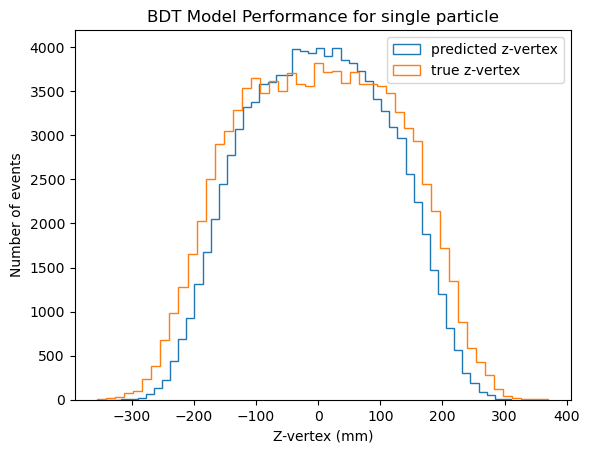

In [10]:
# plot the result
plt.hist(ypred, bins=50,histtype='step',label='predicted z-vertex')
plt.hist(test_target, bins=50,histtype='step',label='true z-vertex')
plt.xlabel('Z-vertex (mm)')
plt.ylabel('Number of events')
plt.title('BDT Model Performance for single particle')
plt.legend()
plt.show()

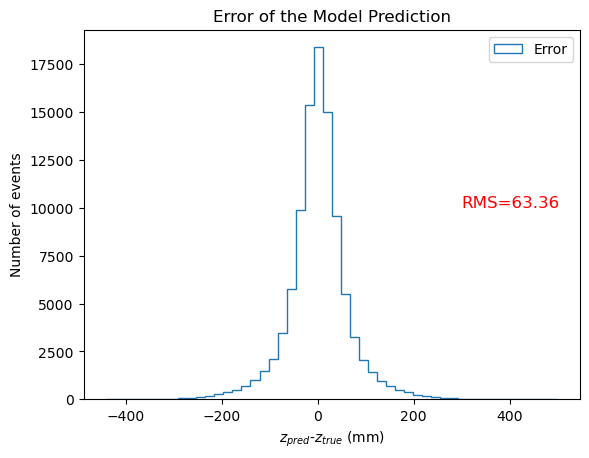

In [25]:
# plot the result
plt.hist(ypred-test_target, bins=50,histtype='step',label='Error')
plt.xlabel('$z_{pred}$-$z_{true}$ (mm)')
plt.ylabel('Number of events')
plt.title('Error of the Model Prediction')
plt.text(300, 10000, 'RMS=63.36', fontsize=12, color='red')
plt.legend()
plt.show()

0.9409197636648845


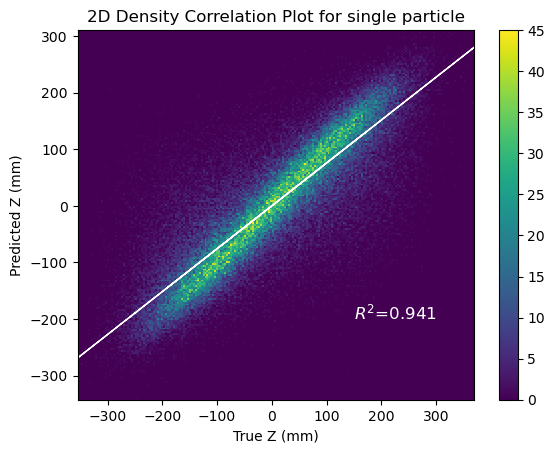

In [27]:
# Creating the hexbin plot
hb = plt.hist2d(test_target, ypred, bins=200)
plt.colorbar()

# Adding a best-fit line
m, b = np.polyfit(test_target, ypred, 1)  # Compute the best-fit line parameters
plt.plot(test_target, m*test_target + b, color='white', linewidth=1)  # Add the best-fit line to the plot
rs = 1 - np.sum((test_target-(m*test_target + b))**2)/np.sum((test_target-np.mean(test_target))**2)
print(rs)
# Customizing the plot
plt.xlabel('True Z (mm)')
plt.ylabel('Predicted Z (mm)')
plt.title('2D Density Correlation Plot for single particle')
plt.text(150, -200, '$R^2$=0.941', fontsize=12, color='white')
plt.show()

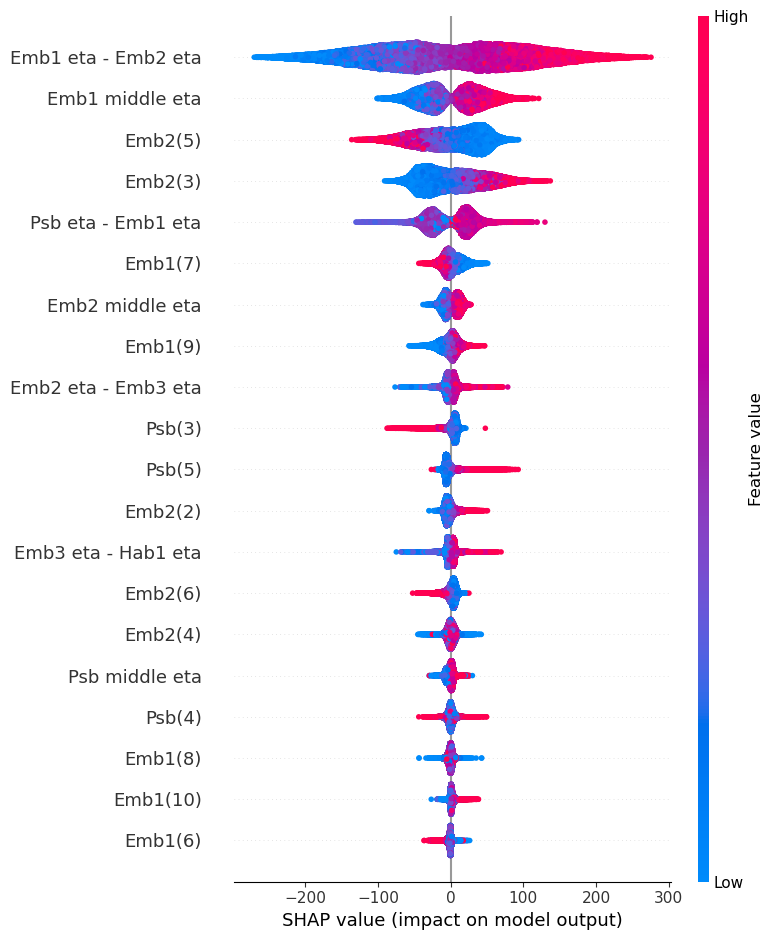

In [61]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(test2,check_additivity=False)
fn = ['Psb(0)','Psb(1)','Psb(2)','Psb(3)','Psb(4)','Psb(5)','Psb(6)','Psb(7)','Psb(8)',
      'Emb1(0)','Emb1(1)','Emb1(2)','Emb1(3)','Emb1(4)','Emb1(5)','Emb1(6)','Emb1(7)','Emb1(8)',
      'Emb1(9)','Emb1(10)','Emb1(11)','Emb1(12)','Emb1(13)','Emb1(14)','Emb1(15)','Emb1(16)',
      'Emb2(0)','Emb2(1)','Emb2(2)','Emb2(3)','Emb2(4)','Emb2(5)','Emb2(6)','Emb2(7)','Emb2(8)',
      'Emb3(0)','Emb3(1)','Emb3(2)','Emb3(3)','Emb3(4)','Emb3(5)','Emb3(6)','Emb3(7)','Emb3(8)',
      'Hab1(0)','Hab1(1)','Hab1(2)','Hab1(3)','Hab1(4)','Hab1(5)','Hab1(6)','Hab1(7)','Hab1(8)',
      'Psb middle eta','Emb1 middle eta','Emb2 middle eta','Emb3 middle eta','Hab1 middle eta',
      'Psb eta - Emb1 eta','Emb1 eta - Emb2 eta','Emb2 eta - Emb3 eta','Emb3 eta - Hab1 eta']
shap.summary_plot(shap_values, test2,feature_names=fn)

In [35]:
def performance(n,d):
    'input number of boosting rounds and maximum tree depth'
    model = xgb.XGBRegressor(learning_rate=0.2, n_estimators = n, max_depth = d, objective='reg:squarederror')
    # train model
    model.fit(train2, train_target)
    ypred = model.predict(test2)
    # calculate MSE
    residual = test_target-ypred
    MSE = np.mean(residual**2)
    # count number of nodes
    dump_list = model.get_booster().get_dump()
    nodes = 0
    for tree_structure in dump_list:
        nodes += len(tree_structure.split('\n')) - 1

    return MSE, nodes

Text(0.5, 1.0, 'Correlation of performance of the BDT model to its size')

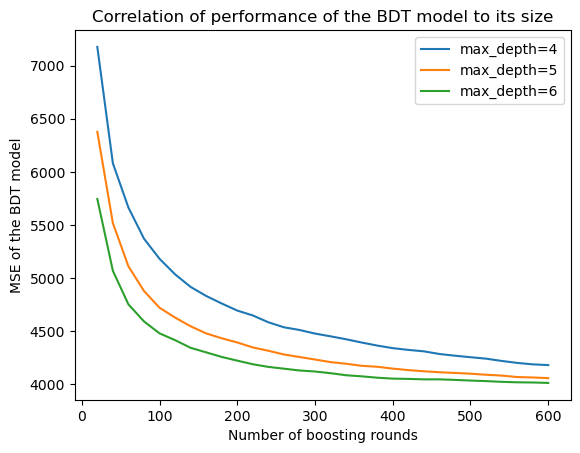

In [40]:
N = np.arange(20, 601, 20)
MSE_4 = np.zeros(len(N))
MSE_5 = np.zeros(len(N))
MSE_6 = np.zeros(len(N))
N4 = np.zeros(len(N))
N5 = np.zeros(len(N))
N6 = np.zeros(len(N))

for i in range(len(N)):
    MSE_4[i] = performance(N[i],4)[0]
    MSE_5[i] = performance(N[i],5)[0]
    MSE_6[i] = performance(N[i],6)[0]
    N4[i] = performance(N[i],4)[1]
    N5[i] = performance(N[i],5)[1]
    N6[i] = performance(N[i],6)[1]
    
plt.figure()
plt.plot(N,MSE_4,label='max_depth=4')
plt.plot(N,MSE_5,label='max_depth=5')
plt.plot(N,MSE_6,label='max_depth=6')
plt.legend()
plt.xlabel("Number of boosting rounds")
plt.ylabel("MSE of the BDT model")
plt.title("Correlation of performance of the BDT model to its size")

Text(0.5, 1.0, 'Correlation of performance of the BDT model to the number of nodes')

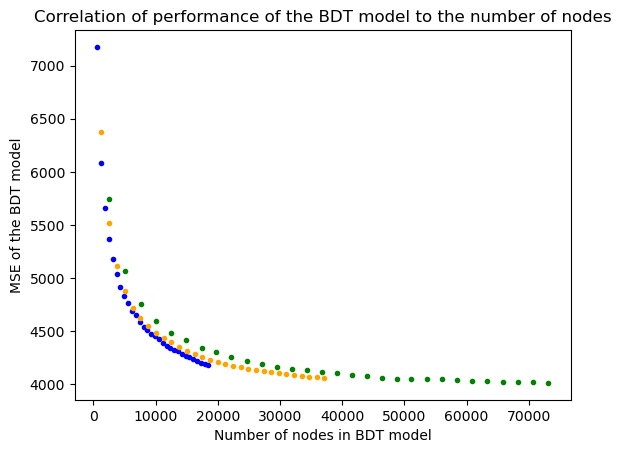

In [59]:
plt.figure()
plt.plot(N4,MSE_4,'.',color="blue")
plt.plot(N5,MSE_5,'.',color="orange")
plt.plot(N6,MSE_6,'.',color="green")
plt.xlabel("Number of nodes in BDT model")
plt.ylabel("MSE of the BDT model")
plt.title("Correlation of performance of the BDT model to the number of nodes")